In [7]:
#Leer titanic_dataset.csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [8]:
# Leer el dataset
df = pd.read_csv('titanic_dataset.csv')

In [9]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [10]:
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

In [22]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [13]:
df['Sex'] = pd.Categorical(df['Sex']).codes
df['Embarked'] = pd.Categorical(df['Embarked']).codes

In [14]:
df.fillna(df.mean(), inplace=True)

In [16]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,1.529742
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.800254
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,-1.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [23]:
# Separar las características y la variable objetivo
X = df.drop(columns=['Survived'])
y = df['Survived']

In [24]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [27]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [28]:
# Escalar las caracteristicas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [36]:
type(X_scaled)

numpy.ndarray

In [37]:
# Crear dataframe con las caracteristicas escaladas
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [38]:
X_scaled_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.827377,0.737695,-0.592481,0.432793,-0.473674,-0.502445,0.587966
1,-1.566107,-1.355574,0.638789,0.432793,-0.473674,0.786845,-1.912644
2,0.827377,-1.355574,-0.284663,-0.474545,-0.473674,-0.488854,0.587966
3,-1.566107,-1.355574,0.407926,0.432793,-0.473674,0.420730,0.587966
4,0.827377,0.737695,0.407926,-0.474545,-0.473674,-0.486337,0.587966


In [40]:
# Obtener las estadísticas descriptivas del dataframe escalado redondeado a dos decimales
X_scaled_df = X_scaled_df.round(2)
X_scaled_df.describe()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.00000,891.000000,891.000000,891.000000,891.000000
mean,0.000370,-0.000067,0.00018,0.002346,0.003176,0.000056,0.002177
std,1.003285,1.003779,1.00052,0.998327,0.999511,1.000748,1.000318
min,-1.570000,-1.360000,-2.25000,-0.470000,-0.470000,-0.650000,-3.160000
25%,-0.370000,-1.360000,-0.59000,-0.470000,-0.470000,-0.490000,-0.660000
50%,0.830000,0.740000,0.00000,-0.470000,-0.470000,-0.360000,0.590000
75%,0.830000,0.740000,0.41000,0.430000,-0.470000,-0.020000,0.590000
max,0.830000,0.740000,3.87000,6.780000,6.970000,9.670000,0.590000


In [41]:
# Aplicar PCA con todos los componentes
pca_full = PCA()
pca_full.fit(X_scaled_df)

,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [43]:
# Calcular la varianza explicada
explained_variance = pca_full.explained_variance_ratio_
# Calcular la varianza acumulada
cumulative_variance = np.cumsum(explained_variance)

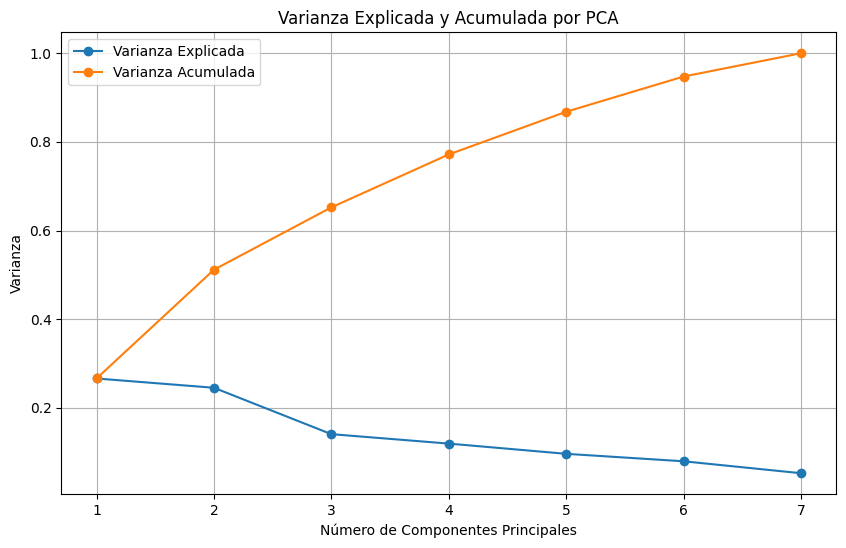

Varianza explicada por los primeros 2 componentes: 51.16%


In [52]:
# Visualizar la varianza explicada y acumulada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', label='Varianza Explicada')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', label='Varianza Acumulada')
plt.title('Varianza Explicada y Acumulada por PCA')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza')
plt.xticks(range(1, len(explained_variance) + 1))
plt.legend()
plt.grid()
plt.show()
print(f'Varianza explicada por los primeros 2 componentes: {sum(explained_variance[:2]):.2%}')


In [ ]:
# Varianza premisa = 0.95

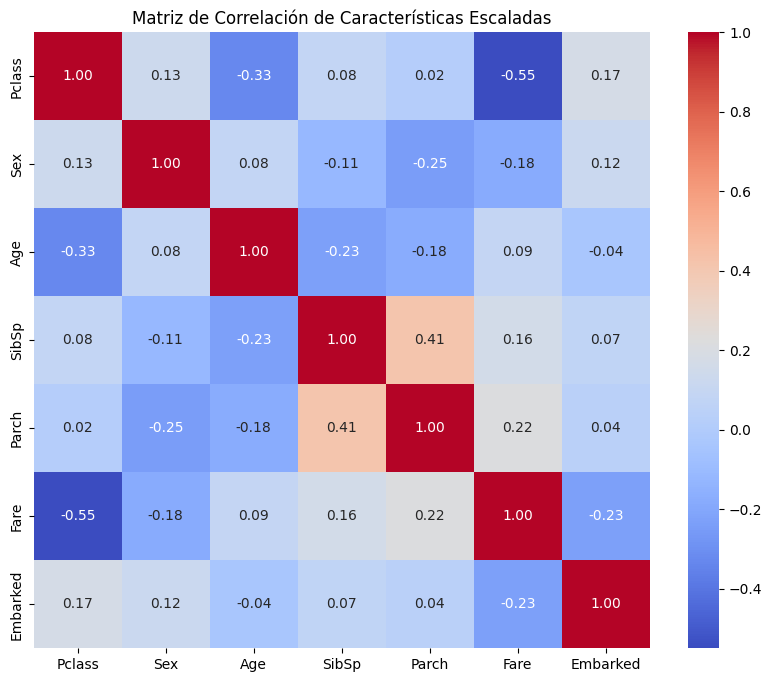

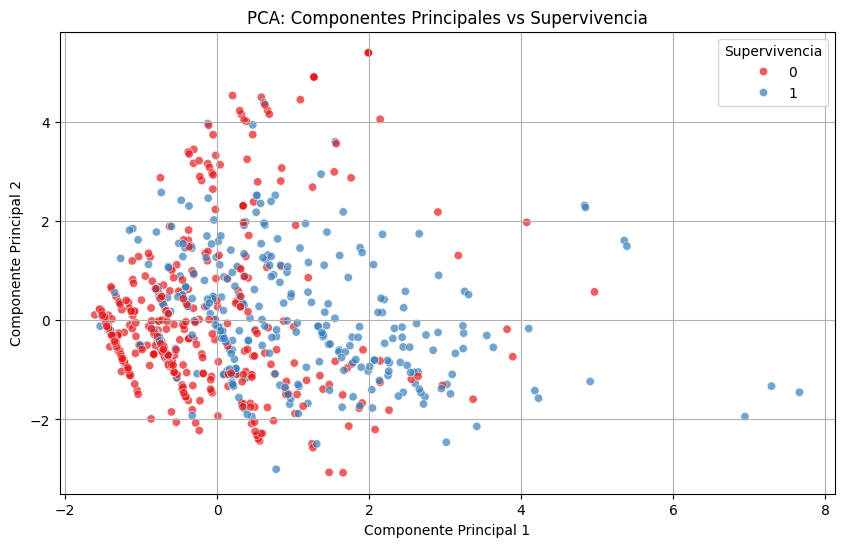

In [53]:
# Matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(X_scaled_df.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Matriz de Correlación de Características Escaladas')
plt.show()
# Aplicar PCA con 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_df)
# Crear un DataFrame con los componentes principales
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
# Añadir la variable objetivo al DataFrame de PCA
pca_df['Survived'] = y.values
# Visualizar los componentes principales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Survived', palette='Set1', alpha=0.7)
plt.title('PCA: Componentes Principales vs Supervivencia')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Supervivencia', loc='upper right')
plt.grid()
plt.show()

In [59]:
pca_2 = PCA(n_components=2) 
pca_2.fit_transform(X_scaled_df)
# Crear un dataframe con los componentes principales
pca_2_df = pd.DataFrame(data=pca_2.components_, columns=X_scaled_df.columns, index=['PC1', 'PC2'])





In [60]:
pca_2_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PC1,-0.542098,-0.341075,0.151615,0.169072,0.272143,0.612476,-0.298391
PC2,0.323380,-0.233330,-0.494933,0.542991,0.524132,-0.025711,0.160650
